In [78]:
import tensorflow as tf
import numpy as np

In [88]:
import os
import dataloader

In [9]:
from importlib import reload

In [87]:
reload(dataloader)

<module 'dataloader' from 'c:\\Users\\Dell\\Documents\\Studia\\magisterka\\projekt\\dataloader.py'>

In [2]:
ROOT_DIR = '.'
DATA_DIR = 'BRATS_2018'
TRAIN_DIR = 'MICCAI_BraTS_2018_Data_Training'
TEST_DIR = 'MICCAI_BraTS_2018_Data_Validation'
TRAIN_PATH = os.path.join(ROOT_DIR, DATA_DIR, TRAIN_DIR)
TEST_PATH = os.path.join(ROOT_DIR, DATA_DIR, TEST_DIR)

In [3]:
train_brains, val_brains, test_brains = dataloader.load_dataset_paths(TRAIN_PATH, TEST_PATH)

In [89]:
train_generator = dataloader.DataGenerator(train_brains)

In [90]:
elo = train_generator.__getitem__(0)

In [104]:
import matplotlib.pyplot as plt
import nibabel as nib

In [111]:
test = nib.load('.\\BRATS_2018\\MICCAI_BraTS_2018_Data_Training\\HGG\\Brats18_2013_2_1\\Brats18_2013_2_1_flair.nii').get_fdata()

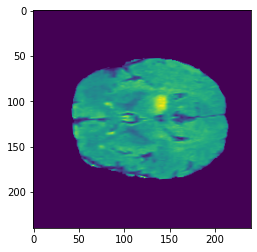

In [158]:
plt.imshow(test[:, :, 77])

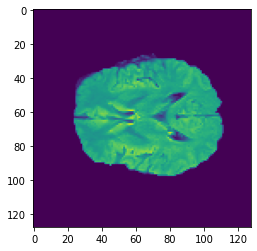

In [170]:
plt.imshow(elo[0][16, :, :, 3])

In [187]:
def generator_fn():
    yield from dataloader.DataGenerator(train_brains)


In [188]:
dataset = tf.data.Dataset.from_generator(generator_fn, output_signature=(
    tf.TensorSpec(shape=(32, 128, 128, 4), dtype=tf.float32),
    tf.TensorSpec(shape=(32, 128, 128), dtype=tf.int8)
))

In [175]:
type(dataset)

tensorflow.python.data.ops.flat_map_op._FlatMapDataset

In [189]:
dataset = dataset.prefetch(1)

In [179]:
type(dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [192]:
i = 0
for elem in dataset:
    if i == 3:
        break
    print(elem)
    i += 1

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} TypeError: 'list' object cannot be interpreted as an integer
Traceback (most recent call last):

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\ops\script_ops.py", line 268, in __call__
    ret = func(*args)

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\Dell\AppData\Local\Temp/ipykernel_2968/1449808727.py", line 2, in generator_fn
    yield from dataloader.DataGenerator(train_brains)

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\utils\data_utils.py", line 567, in __iter__
    for item in (self[i] for i in range(len(self))):

TypeError: 'list' object cannot be interpreted as an integer


	 [[{{node PyFunc}}]] [Op:IteratorGetNext] name: 